# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview

pyber_data_df.ride_id = pyber_data_df.ride_id.astype(np.int64)
pyber_data_df.info()
# pyber_data_df.to_csv("pyber_data_df_joined.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()['ride_id']
type_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
# first isolate the cities with type and driver_count info
# remove duplicate cities into new df
cities_df = pyber_data_df.drop_duplicates(subset=['city'])
type_driver_total = cities_df.groupby("type").sum()["driver_count"]
type_driver_total

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
type_fares_total = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fares_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
type_fares_ride_mean = type_fares_total / type_ride_count
type_fares_ride_mean

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
type_fares_driver_mean = type_fares_total / type_driver_total
type_fares_driver_mean

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
# Adding a list of values with keys to create a new DataFrame.

PyBer_summary_df = pd.DataFrame({
             "Total Rides": type_ride_count,
             "Total Drivers": type_driver_total,
             "Total Fares": type_fares_total,
             "Average Fare per Ride": type_fares_ride_mean,
             "Average Fare per Driver": type_fares_driver_mean})
PyBer_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
PyBer_summary_df["Total Rides"] = PyBer_summary_df["Total Rides"].map("{:,.0f}".format)
PyBer_summary_df["Total Drivers"] = PyBer_summary_df["Total Drivers"].map("{:,.0f}".format)
PyBer_summary_df["Total Fares"] = PyBer_summary_df["Total Fares"].map("${:,.2f}".format)
PyBer_summary_df["Average Fare per Ride"] = PyBer_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
PyBer_summary_df["Average Fare per Driver"] = PyBer_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8550370000000,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9018730000000,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2781340000000,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4256850000000,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_date_type_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
# fares_date_type_df.to_csv("fares_date_type_df.csv")
fares_date_type_df.head()

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
Name: fare, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_date_type_df = fares_date_type_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_date_type_pivot = fares_date_type_df.pivot(index="date", columns="type", values="fare")
fares_date_type_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [35]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

Date_group_JanApr = fares_date_type_pivot.loc['1/1/2019':'5/2/2019']  
# Date_group_JanApr.to_csv("Data_group_JanApr.csv")

In [36]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
Date_group_JanApr.index = pd.to_datetime(Date_group_JanApr.index)
Date_group_JanApr.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               '2019-01-01 17:22:00', '2019-01-01 21:04:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               ...
               '2019-05-01 21:53:00', '2019-05-01 23:05:00',
               '2019-05-01 02:18:00', '2019-05-01 03:12:00',
               '2019-05-01 04:34:00', '2019-05-01 04:53:00',
               '2019-05-01 05:16:00', '2019-05-01 08:14:00',
               '2019-05-01 09:07:00', '2019-05-01 09:45:00'],
              dtype='datetime64[ns]', name='date', length=2239, freq=None)

In [37]:
# 7. Check that the datatype for the index is datetime using df.info()
Date_group_JanApr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2239 entries, 2019-01-01 00:08:00 to 2019-05-01 09:45:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     119 non-null    float64
 1   Suburban  586 non-null    float64
 2   Urban     1537 non-null   float64
dtypes: float64(3)
memory usage: 70.0 KB


In [38]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Date_group_JanApr_Week_df = Date_group_JanApr.resample('W').sum()
Date_group_JanApr_Week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


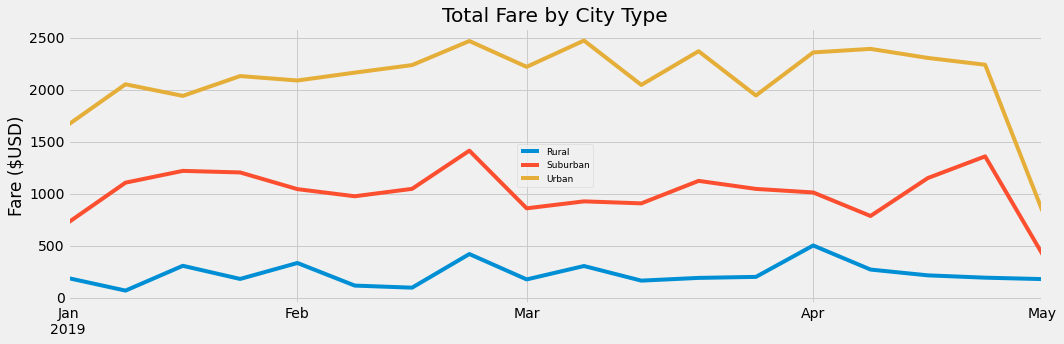

In [39]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Use DataFrame.plot() in order to create a bar chart of the data
Date_group_JanApr_Week_df.plot(kind="line", figsize=(15,5))

# Set a title for the chart
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("")
plt.legend(loc='center', fontsize='9')

plt.tight_layout()
# plt.show()
plt.gcf()
# Save the figure.
plt.savefig("Analysis/PyBer_Summary_Chart.png")
         